In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A lo largo de este proyecto se pretende analizar las canciones más populares y por lo tanto las variables de las cuales depende mayormente. A final del proyecto se espera tener las condiciones que maximicen la probabilidad de tener una canción popular.

algunas de las variables a analizar son: 

- 'acousticness', 
- 'artists', 
- 'danceability', 
- 'duration_ms', 
- 'energy',
- 'explicit', 
- 'id', 
- 'instrumentalness', 
- 'key', 
- 'liveness', 
- 'loudness',    
- 'mode', 
- 'name', 
- 'popularity', 
- 'release_date', 
- 'speechiness', 
- 'tempo',
- 'valence', 
- 'year'
      

más información acerca de estas variables y su significado desde la documentación oficial de spotify: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-track

- acousticness:

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 	

- danceability:

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 	

- duration_ms:

The duration of the track in milliseconds. 	

- energy:

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 	

- id:

The Spotify ID for the track. 	

- instrumentalness:

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 	

- key:

The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 	

- liveness:

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 	

- loudness:

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 	

- mode:

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. 	

- speechiness:

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 	

- tempo:

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 	

- time_signature:

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 	

- valence:

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Nuestra base de datos se conforma de la siguiente manera:

In [119]:
data = pd.read_csv('archive/data.csv')
data = data[data['popularity']>0]
data = data[data['duration_ms']<600000]
data = data[data['instrumentalness'] > 0.0]
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [123]:
len(data)

96230

#### Danceability

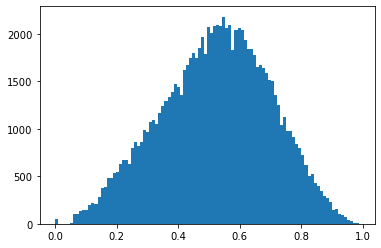

In [124]:
plt.hist(data['danceability'],bins = 100);

#### Popularity

Tomaremos únicamente aquellas que sean escuchadas 'regularmente'. Se eliminarán aquellas que tengan un valor de pupularidad 0. 

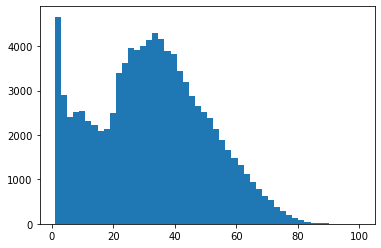

In [125]:
plt.hist(data['popularity'], bins = 50);

#### Acousticness

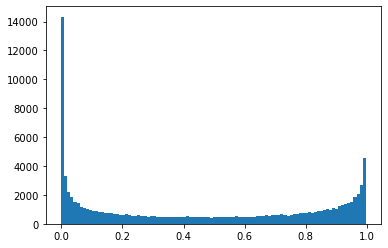

In [126]:
plt.hist(data['acousticness'] ,bins = 100);

#### Valence

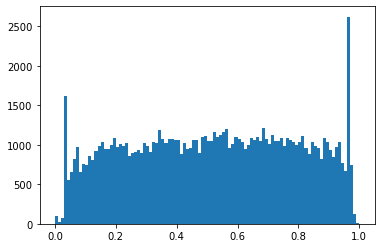

In [127]:
plt.hist(data['valence'] ,bins = 100);

#### Duration

Canciones con más de 10 minutos de duración serán descartadas (600000 ms) 

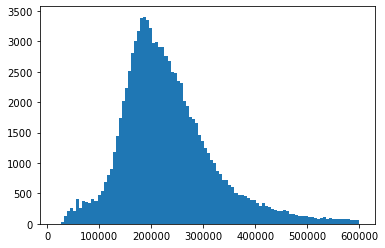

In [128]:
plt.hist(data['duration_ms'][data['duration_ms']<600000] ,bins = 100);

#### Energy

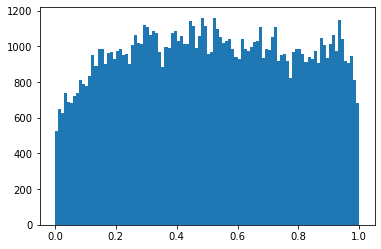

In [129]:
plt.hist(data['energy'] ,bins = 100);

#### Instrumentalness

Valores demasiado cercanos a 0 significaría que no tiene ningún instrumento. Por lo tanto no cumpliría con nuestra definición de música. Se descartarán todas aquellas 'canciones' que sean 'a capella' o podcasts.

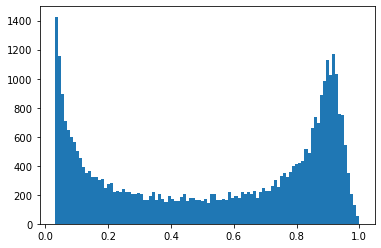

In [131]:
plt.hist(data['instrumentalness'][data['instrumentalness'] > 0.03] ,bins = 100);

#### Liveness

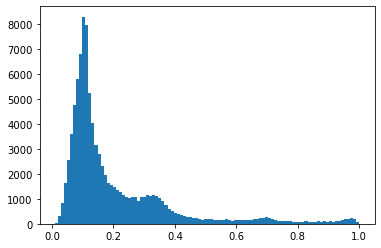

In [132]:
plt.hist(data['liveness'] ,bins = 100);

#### mode

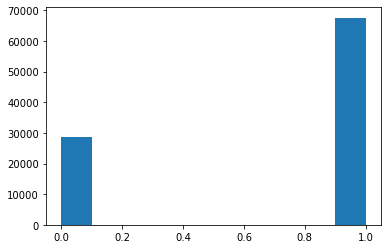

In [134]:
plt.hist(data['mode']);

#### speechiness

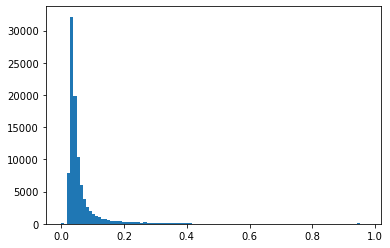

In [135]:
plt.hist(data['speechiness'] ,bins = 100);

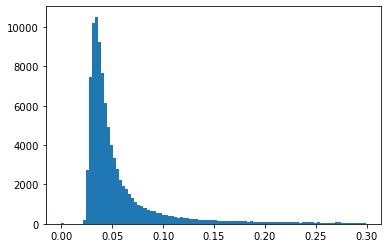

In [137]:
plt.hist(data['speechiness'][data['speechiness'] < 0.3] ,bins = 100);

#### Tempo

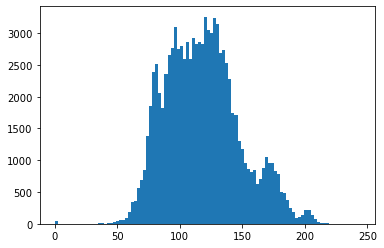

In [138]:
plt.hist(data['tempo'] ,bins = 100);